In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
%matplotlib inline
import os
import csv
import os
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

# Create data:
x0, sigma = 0, 0.1
y, xe  = np.histogram(np.random.normal(x0, sigma, 1000))
x = .5 * (xe[:-1] + xe[1:])

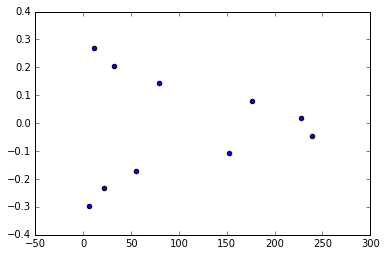

In [9]:
plt.scatter(y, x)

In [2]:

# Function to be fitted
def gauss(x, x0, y0, sigma):
    p = [x0, y0, sigma]
    return p[1]* np.exp(-((x-p[0])/p[2])**2)

# Initialization parameters
p0 = [1., 1., 1.]
# Fit the data with the function
fit, tmp = curve_fit(gauss, x, y, p0=p0)

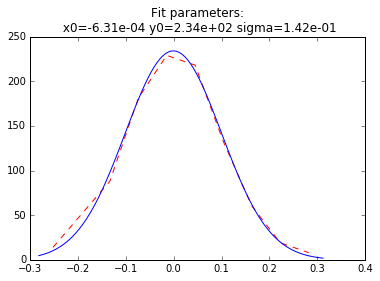

In [3]:

# Plot the results
plt.title('Fit parameters:\n x0=%.2e y0=%.2e sigma=%.2e' % (fit[0], fit[1], fit[2]))
# Data
plt.plot(x, y, 'r--')
# Fitted function
x_fine = np.linspace(xe[0], xe[-1], 100)
plt.plot(x_fine, gauss(x_fine, fit[0], fit[1], fit[2]), 'b-')
plt.show()

In [66]:

import numpy as np
import sklearn
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


Automatically created module for IPython interactive environment


In [11]:


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

In [12]:

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

In [14]:


plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


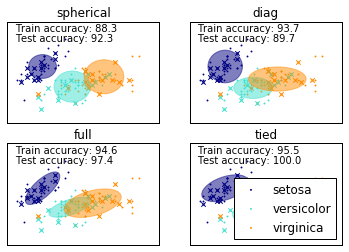

In [17]:


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

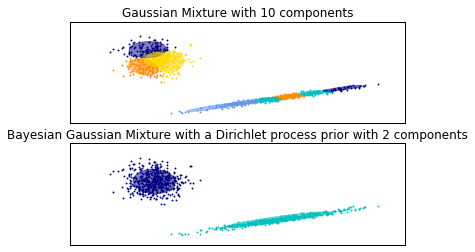

In [244]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    num_components = 0 
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        num_components = num_components + 1
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title(title.format(num_components))


# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=10, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture with {} components')

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=2,
                                        covariance_type='full').fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior with {} components')

plt.show()

In [25]:
X.shape

(1000, 2)

In [36]:
folder_to_name = {'hsbam': 'hsbam',
                  'wtF': 'wtF',
                  'wtJ': 'wtJ',
                  '96h': '96h',
                  'traffic_jam': 'tj_dpp',
                  'bam_mutants': 'bam',
                  'oskar': 'osk'
                 }
matrices_dir = "/Users/ndeveaux/Dropbox (Simons Foundation)/Drosophila_Inferelator_Project"
data_frames = {}

tech = 'cellranger'

for folder in folder_to_name:
    subfolder = folder_to_name[folder]
    matrix_dir = os.path.join(os.path.join(matrices_dir,subfolder), tech)
    mat = scipy.io.mmread(os.path.join(matrix_dir, "matrix.mtx"))
 
    genes_path = os.path.join(matrix_dir, "genes.tsv")
    gene_ids = [row[0] for row in csv.reader(open(genes_path), delimiter="\t")]
    gene_names = [row[1] for row in csv.reader(open(genes_path), delimiter="\t")]
 
    barcodes_path = os.path.join(matrix_dir, "barcodes.tsv")
    barcodes = [row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")]
    arr=mat.toarray()
    df = pd.DataFrame(arr)
    df.index = gene_names
    df.columns = barcodes 
    data_frames[folder] = df

In [37]:
germ_cell_metagene = ['bru1',
'Pdcd4',
'RpS5b',
'AGO3',
'vas',
'ovo',
'TfIIA-S',
'CG9926']

In [38]:
dset = 'wtJ' # 'wtF'

In [300]:
df = data_frames[dset]
# Minimum of gene expressed in 3 cells, minimum of 100 genes per cell
df = df.loc[df.sum(axis = 1) > 3,df.sum(axis = 0) > 100]
mito_df = df[[x.__contains__("mt:") for x in df.index]]
percent_mito = mito_df.sum(axis=0)/df.sum(axis = 0)
percent_mito_5percent = percent_mito < 0.05
df = df.loc[:, percent_mito_5percent]
    

In [298]:
germcs = df.loc[germ_cell_metagene,(df.loc[germ_cell_metagene,:] > 0).all()]

In [270]:
germcs.shape

(8, 244)

In [192]:
df.shape

(10117, 1178)

In [265]:
combined = df
scale_factor = 10000
# pseudocount added so that log isn't taken of 0
combined_transformed = np.log((combined / combined.sum() *  scale_factor) + 1)

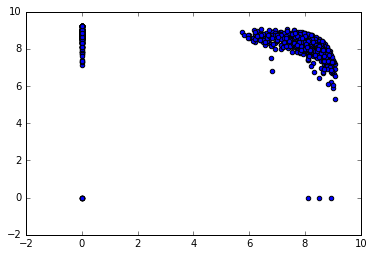

In [118]:
plt.scatter(combined_transformed.loc[['RpS5b'],:], combined_transformed.loc[['Pdcd4'],:])

In [119]:
pca = sklearn.decomposition.PCA(n_components=10)

In [120]:
X = df.transpose() # combined_transformed.transpose()
pca.fit(X)
print(pca.explained_variance_ratio_)  

[ 0.82632718  0.09508408  0.01246114  0.00993035  0.00600179  0.00384051
  0.00285367  0.00221781  0.00188262  0.00134004]


In [177]:
combined.shape

(11985, 1178)

In [122]:
X_r = pca.fit(X).transform(X)

In [107]:
range(len(germ_cell_metagene))

[0, 1, 2, 3, 4, 5, 6, 7]

In [108]:
pca.components_[0]

array([ 0.10655075,  0.14439312, -0.38959214,  0.20946436,  0.42961888,
        0.69591137, -0.1264427 ,  0.29544447])

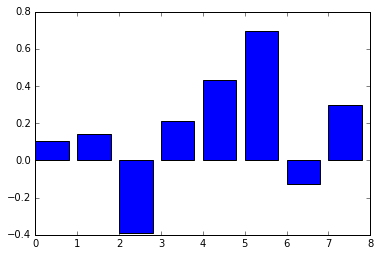

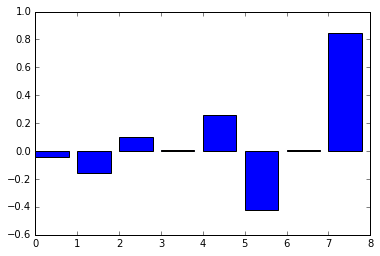

In [109]:
plt.bar(range(len(germ_cell_metagene)), pca.components_[0], label = germ_cell_metagene)
plt.show()
plt.bar(range(len(germ_cell_metagene)), pca.components_[1], label = germ_cell_metagene)
plt.show()


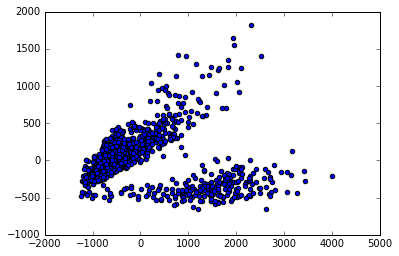

In [126]:
plt.scatter(X_r[:, 0], X_r[:, 1])

In [127]:
X_r.shape

(1178, 10)

In [129]:
X_r

array([[  8.05385801e+02,   6.29000786e+02,  -1.13148608e+02, ...,
         -4.51810239e+01,  -1.59390786e+01,   2.18247800e+01],
       [  9.90503696e+02,  -3.52080015e+02,  -5.74213239e+01, ...,
          5.43594276e+01,  -3.04302021e+01,   4.38715387e+01],
       [ -1.43724332e+02,  -4.48799949e+02,   1.48357654e+02, ...,
         -7.89407616e+01,  -6.08401023e+01,  -1.05788376e+01],
       ..., 
       [  1.64935546e+03,   1.24478758e+03,  -1.60219994e+02, ...,
         -1.03025441e+02,   4.28495988e+01,   4.54167686e+01],
       [ -7.22032412e+02,  -5.06299945e+01,  -4.64219912e-01, ...,
          3.21528090e+01,   3.27055233e+01,  -2.81208859e+01],
       [ -4.49552649e+02,  -1.21368422e+02,  -1.51045365e+02, ...,
         -3.31693504e+01,   4.83324623e+01,   2.48553332e+01]])

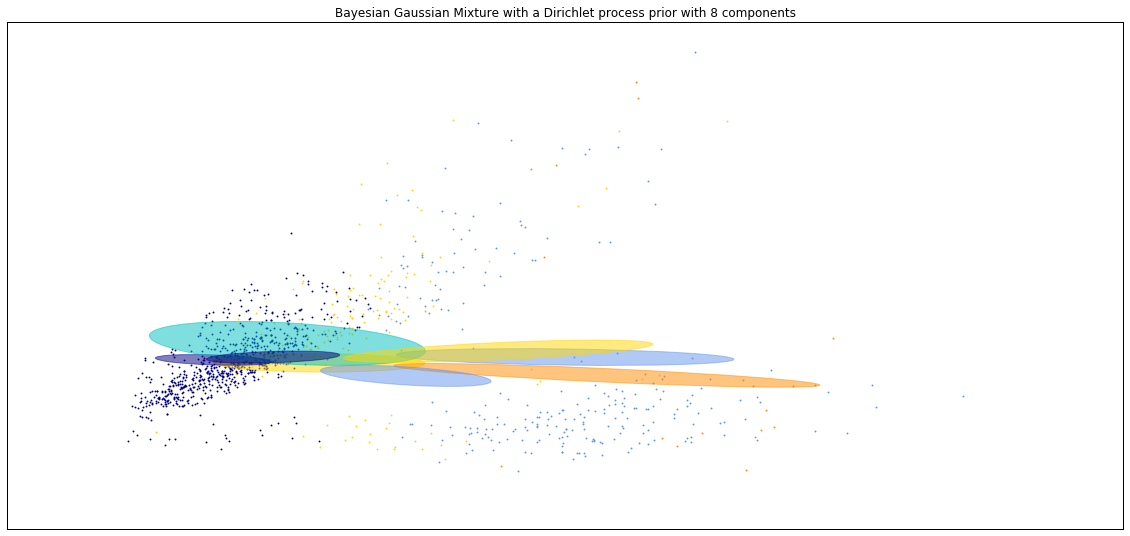

In [156]:
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=15,
                                        covariance_type='full').fit(X_r[:, [0,9]])
plt.figure(figsize=(20, 20))
plot_results(X_r[:, [0,1]], dpgmm.predict(X_r[:, [0,9]]), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior with {} components')

plt.show()

In [148]:
dpgmm.covariances_

array([[[  6.18878856e+05,  -1.34819737e+04],
        [ -1.34819737e+04,   1.79119793e+04]],

       [[  7.71888346e+04,  -6.09211050e+03],
        [ -6.09211050e+03,   2.47158263e+03]],

       [[  2.01198932e+05,   3.54929777e+04],
        [  3.54929777e+04,   3.12120099e+04]],

       [[  3.92170928e+05,  -6.12978828e+04],
        [ -6.12978828e+04,   1.91860177e+04]],

       [[  1.60649446e+05,  -2.18214924e+04],
        [ -2.18214924e+04,   1.06630635e+04]],

       [[  5.79656359e+05,   8.98267493e+03],
        [  8.98267493e+03,   4.10834444e+03]],

       [[  6.53173647e+04,  -1.03878017e+03],
        [ -1.03878017e+03,   1.07996880e+03]],

       [[  4.78367390e+05,  -8.80946180e+01],
        [ -8.80946180e+01,   7.24501590e+03]],

       [[  4.78397249e+05,  -8.70361225e+01],
        [ -8.70361225e+01,   7.24509247e+03]],

       [[  4.78426678e+05,  -8.59929493e+01],
        [ -8.59929493e+01,   7.24516794e+03]],

       [[  1.94288638e+06,   4.66088621e+05],
        [  4.6

In [267]:
## Focus on reproducing seurat analysis
def LogVMR(X):
  return np.log(np.var(np.exp(X) - 1, axis = 1) / np.mean(np.exp(X) - 1, axis = 1))
def ExpMean(X):
  return np.log(np.mean(np.exp(X) - 1, axis = 1) + 1)


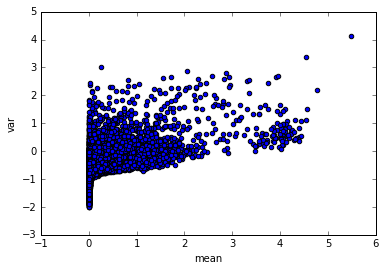

In [268]:
plt.scatter(ExpMean(combined_transformed), LogVMR(combined_transformed))
plt.xlabel('mean')
plt.ylabel('var')

In [166]:
np.var(np.exp(X) - 1)

217.17913591974047

In [281]:
# remove germ from df
df_no_germs = df.loc[:, [x not in germcs.columns  for x in df.columns]]

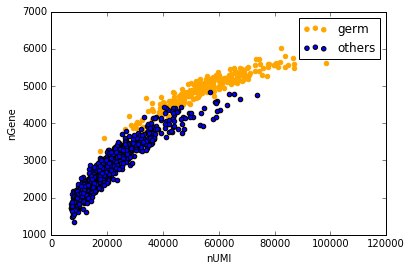

In [301]:
mito_df = df[[x.__contains__("mt:") for x in df.index]]
percent_mito = mito_df.sum(axis=0)/df.sum(axis = 0)
nGene = df[df > 0].count(axis = 0)
nUMI = df.sum(axis = 0)
plt.scatter(nUMI, nGene, color = 'orange')
mito_df = df_no_germs[[x.__contains__("mt:") for x in df_no_germs.index]]
percent_mito = mito_df.sum(axis=0)/df_no_germs.sum(axis = 0)
nGene = df_no_germs[df_no_germs > 0].count(axis = 0)
nUMI = df_no_germs.sum(axis = 0)
plt.scatter(nUMI, nGene)
plt.xlabel('nUMI')
plt.ylabel('nGene')
plt.legend(['germ', 'others'])
plt.show()

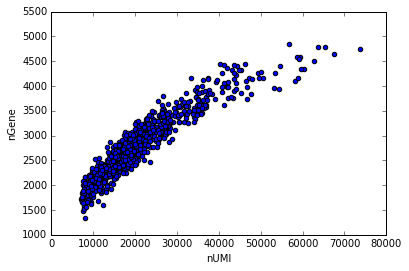

In [283]:
plt.scatter(nUMI, nGene)
plt.xlabel('nUMI')
plt.ylabel('nGene')

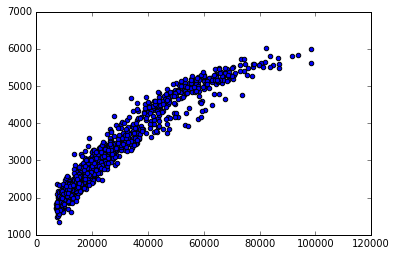

In [233]:
plt.scatter(dat[:, 0], dat[:, 1])

In [285]:
dat = np.array([nUMI.get_values(), nGene.get_values()]).transpose()

In [286]:
dat_train = np.array([dat[:, 1], [np.mean(nUMI) for i in range(len(dat[:, 0]))]]).transpose()

In [287]:
dat_train

array([[  4407.        ,  20279.38115632],
       [  1735.        ,  20279.38115632],
       [  2628.        ,  20279.38115632],
       ..., 
       [  4544.        ,  20279.38115632],
       [  2496.        ,  20279.38115632],
       [  2670.        ,  20279.38115632]])

In [288]:
[np.mean(nUMI) for i in range(len(dat[:, 0]))]

[20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156316915,
 20279.381156

In [249]:
np.mean(nUMI) * len(dat[:, 0])

31976023.0

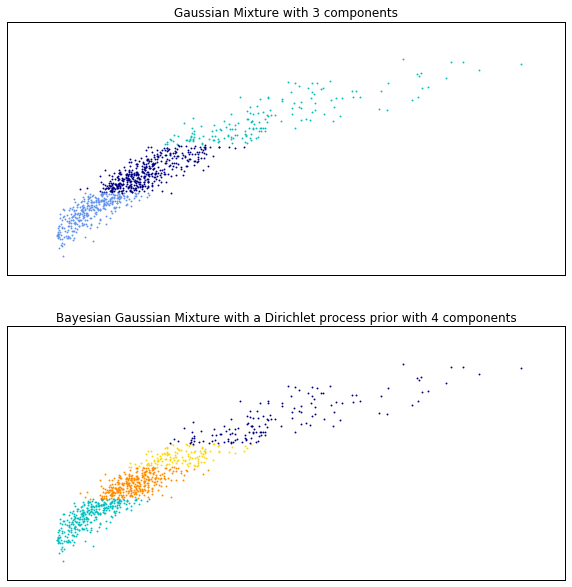

In [290]:
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=7,
                                        covariance_type='full').fit(dat_train)
plt.figure(figsize=(10, 10))
plot_results(dat, dpgmm.predict(dat_train), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior with {} components')


# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(dat_train)
plot_results(dat, gmm.predict(dat_train), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture with {} components')

plt.show()

In [236]:
dat[:, 0]

array([44408, 43977, 26450, ..., 59070, 14748, 18159])

In [237]:
dat[:, 0][0]

44408